# Viewing and Manipulating HYCOM data as an array

Before running for the first time, make sure you have intalled the following all of the packages imported in this script using Anaconda.Navigator if you are not confident with where and how to install them.



In [1]:
#Import packages
import netCDF4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
#!pip install rioxarray
#import rioxarray
#!pip install "cmocean[plots]"
#import cmocean
#!pip install cartopy
#import cartopy.crs as ccrs
#import cartopy.feature as cfeature
#!pip install --no-binary shapely shapely --force

## Import HYCOM netcdf data from url

To download HYCOM data, open this link (https://tds.hycom.org/thredds/catalog.html) in your browser and navigate to the ocean model you want to use.

For Example: 
- scroll down to and select the "GLBu0.08/expt_19.1 (1995-08-01 to 2012-12-31)/" folder
- Then select the year "(2012) Reanalysis Data: 2012-01-01 to 2012-12-31 at 00Z"
- Select the OPENDAP access option
- Within this page, select the extent of the dimensions (lat.,long.,depth,time) and the extent of the variables (e.g. water_u, water_v, water_temp)
- Selecting and defining the extent of these dimensions and variables will adjust the 'Data URL' at the top of the page, which you will copy and paste to create the 'url' object in the script below

In [2]:
#Specify the URL taken from HYCOM...OPENDAP as instructed above
url = 'https://tds.hycom.org/thredds/dodsC/GLBu0.08/expt_19.1/2012?depth[0:1:10],lat[1000:1:2000],lon[3000:1:4499],time[0:1:365],water_u[0:1:365][0:1:10][1000:1:2000][3000:1:4499],water_v[0:1:365][0:1:10][1000:1:2000][3000:1:4499],water_temp[0:1:365][0:1:10][1000:1:2000][3000:1:4499],surf_el[0:1:365][1000:1:2000][3000:1:4499]'

#url = 'https://tds.hycom.org/thredds/dodsC/GLBu0.08/expt_19.1/2012?depth[0:1:39],lat[1000:2000],lon[3000:4400],time[0:1:365],water_u[0:1:365][0:1:39][1000:2000][3000:4400],water_v[0:1:365][0:1:39][1000:2000][3000:4400],water_temp[0:1:365][0:1:39][1000:2000][3000:4400]'

In [3]:
# Download the data specified in the url as netcdf data
dataset = netCDF4.Dataset(url)

#display summary of netcdf data
dataset

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_CLASSIC data model, file format DAP2):
    classification_level: UNCLASSIFIED
    distribution_statement: Approved for public release. Distribution unlimited.
    downgrade_date: not applicable
    classification_authority: not applicable
    institution: Naval Oceanographic Office
    source: HYCOM archive file
    history: archv2ncdf3z
    field_type: instantaneous
    Conventions: CF-1.0 NAVO_netcdf_v1.0
    dimensions(sizes): depth(11), lat(1001), lon(1500), time(366)
    variables(dimensions): float64 depth(depth), float64 lat(lat), float64 lon(lon), float64 time(time), int16 water_u(time,depth,lat,lon), int16 water_v(time,depth,lat,lon), int16 water_temp(time,depth,lat,lon), int16 surf_el(time,lat,lon)
    groups: 

## Import and manipulate HYCOM data as an Xarray

Now you know how to download the netcdf file, it's time to download it as an Xarray object so that you can manipulate, subset and explore it through plots

Much of the code below is based on the example found at this link:
https://www.earthdatascience.org/courses/use-data-open-source-python/hierarchical-data-formats-hdf/use-netcdf-in-python-xarray/


In [4]:

hycom = xr.open_dataset(url)
    
# View xarray object 
hycom


<xarray.Dataset>
Dimensions:     (depth: 11, lat: 1001, lon: 1500, time: 366)
Coordinates:
  * depth       (depth) float64 0.0 2.0 4.0 6.0 8.0 ... 12.0 15.0 20.0 25.0 30.0
  * lat         (lat) float64 0.0 0.08 0.16 0.24 0.32 ... 79.76 79.84 79.92 80.0
  * lon         (lon) float64 60.0 60.08 60.16 60.24 ... 179.7 179.8 179.8 179.9
  * time        (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Data variables:
    water_u     (time, depth, lat, lon) float32 ...
    water_v     (time, depth, lat, lon) float32 ...
    water_temp  (time, depth, lat, lon) float32 ...
    surf_el     (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.0 NAVO_netcdf_v1.0

In [5]:
# View first 5 latitude values
hycom["water_temp"]["lat"].values[:5]

print("The min and max latitude values in the data is:", 
      hycom["water_temp"]["lat"].values.min(), 
      hycom["water_temp"]["lat"].values.max())
print("The min and max longitude values in the data is:", 
      hycom["water_temp"]["lon"].values.min(), 
      hycom["water_temp"]["lon"].values.max())


The min and max latitude values in the data is: 0.0 80.0
The min and max longitude values in the data is: 60.0 179.9200439453125


In [6]:
# The extent of my study region is roughly 118, 150, 10, 38

In [7]:
# View first 5 and last. 5 time values - notice the span of
# dates range from 1950 to 2005
print("The earliest date in the data is:", hycom["water_temp"]["time"].values.min())
print("The latest date in the data is:", hycom["water_temp"]["time"].values.max()) 

The earliest date in the data is: 2012-01-01T00:00:00.000000000
The latest date in the data is: 2012-12-31T00:00:00.000000000


In [8]:
#Check the time dimension and how many steps it has (days within the year)
hycom["water_temp"]["time"].values.shape

(366,)

In [9]:
# Select a single x,y, depth combination from the data
#key=300
longitude = hycom["water_temp"]["lon"].values[850]
latitude = hycom["water_temp"]["lat"].values[350]
surface = hycom["water_temp"]["depth"].values[0]
print("Long, Lat, depth values:", longitude, latitude, surface)

Long, Lat, depth values: 128.0 28.0 0.0


### Plotting HYCOM data with Xarray

What we can do is limited because we can't use Cartopy

In [10]:
# Create a spatial map of your selected location with cartopy
extent = [118, 150, 10, 38]
central_lon = np.mean(extent[:2])
central_lat = np.mean(extent[2:])



In [11]:
# Slice the data spatially using a single lat/lon point and 
# by depth to focus on surface
one_point = hycom["water_temp"].sel(lat=latitude, lon=longitude, depth=surface)
one_point

<xarray.DataArray 'water_temp' (time: 366)>
array([21.799, 21.727, 21.815, ..., 22.337, 22.196, 22.724], dtype=float32)
Coordinates:
    depth    float64 0.0
    lat      float64 28.0
    lon      float64 128.0
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Attributes:
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    units:          degC
    NAVO_code:      15

In [12]:
# View| the first 5 values for that single point
one_point.values[:5]

array([21.799, 21.727, 21.815, 21.739, 21.461], dtype=float32)

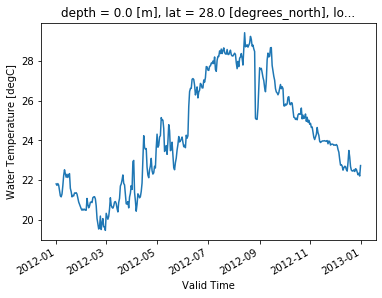

In [13]:
# Use xarray to create a quick time series plot
one_point.plot.line()
plt.show()

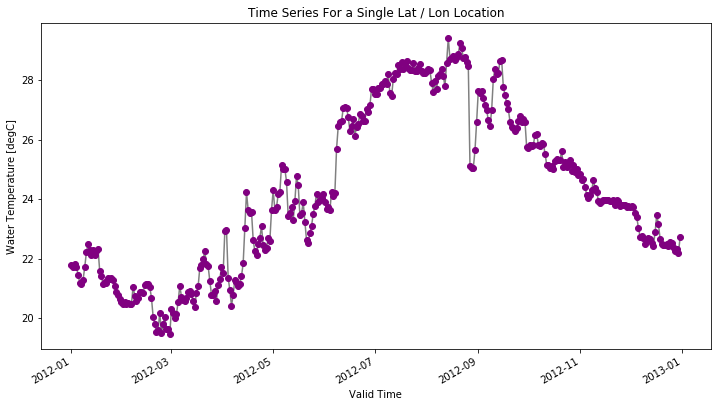

In [14]:
# You can clean up your plot as you wish using standard matplotlib approaches
f, ax = plt.subplots(figsize=(12, 6))
one_point.plot.line(hue='lat',
                    marker="o",
                    ax=ax,
                    color="grey",
                    markerfacecolor="purple",
                    markeredgecolor="purple")
ax.set(title="Time Series For a Single Lat / Lon Location")

# Uncomment the line below if you wish to export the figure as a .png file
# plt.savefig("single_point_timeseries.png")
plt.show()

In [15]:
# Convert to dataframe -- then this can easily be exported to a csv
one_point_df = one_point.to_dataframe()
# View just the first 5 rows of the data
one_point_df.head()

,depth,lat,lon,water_temp
time,,,,
2012-01-01,0.0,28.0,128.0,21.799000
2012-01-02,0.0,28.0,128.0,21.726999
2012-01-03,0.0,28.0,128.0,21.815001
2012-01-04,0.0,28.0,128.0,21.739000
2012-01-05,0.0,28.0,128.0,21.461000


In [16]:
# Export data to .csv file
#one_point_df.to_csv("oki_point_.csv")

In [17]:
start_date = "2012-06-01"
end_date = "2012-07-01"
temp_0601_0701 = hycom["water_temp"].sel(time=slice(start_date, end_date),
                                                    lat=28,
                                                    lon=128, depth=0)


temp_0601_0701

<xarray.DataArray 'water_temp' (time: 31)>
array([23.897   , 23.674   , 23.748001, 23.625   , 24.254   , 24.101   ,
       24.226   , 25.695   , 26.449001, 26.609001, 26.616001, 27.071   ,
       27.109001, 27.061   , 26.775   , 26.284   , 26.458   , 26.689   ,
       26.134   , 26.438   , 26.524   , 26.864   , 26.801   , 26.639   ,
       26.637001, 27.037   , 26.927   , 27.156   , 27.715   , 27.696001,
       27.535   ], dtype=float32)
Coordinates:
    depth    float64 0.0
    lat      float64 28.0
    lon      float64 128.0
  * time     (time) datetime64[ns] 2012-06-01 2012-06-02 ... 2012-07-01
Attributes:
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    units:          degC
    NAVO_code:      15

In [18]:
temp_0601_0701.values

array([23.897   , 23.674   , 23.748001, 23.625   , 24.254   , 24.101   ,
       24.226   , 25.695   , 26.449001, 26.609001, 26.616001, 27.071   ,
       27.109001, 27.061   , 26.775   , 26.284   , 26.458   , 26.689   ,
       26.134   , 26.438   , 26.524   , 26.864   , 26.801   , 26.639   ,
       26.637001, 27.037   , 26.927   , 27.156   , 27.715   , 27.696001,
       27.535   ], dtype=float32)

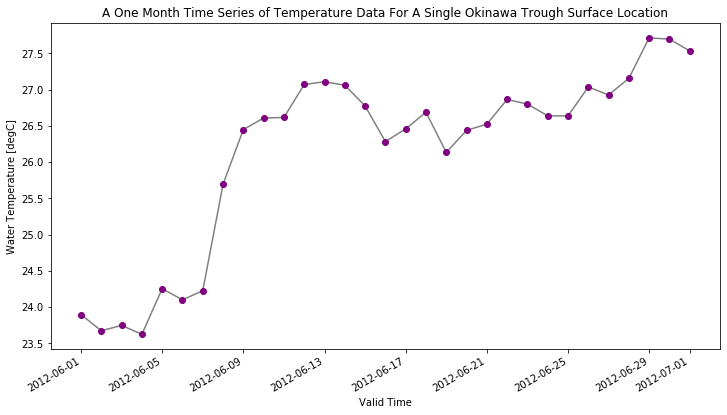

In [19]:
# Plot the data just like you did above
f, ax = plt.subplots(figsize=(12, 6))
temp_0601_0701.plot.line(hue='lat',
                         marker="o",
                         ax=ax,
                         color="grey",
                         markerfacecolor="purple",
                         markeredgecolor="purple")
ax.set(title="A One Month Time Series of Temperature Data For A Single Okinawa Trough Surface Location")
plt.show()

In [20]:
# Focus on two day's worth of data

start_date = "2012-06-08"
end_date = "2012-06-09"

#Spatial extent of focus 118, 150, 10, 38

two_day_conus = hycom["water_temp"].sel(
    time=slice(start_date, end_date), lat=slice(10, 38), 
    lon=slice(118, 150), depth=0)
# Notice that time has a value of **2** below representing two time steps or days worth of data
two_day_conus

<xarray.DataArray 'water_temp' (time: 2, lat: 351, lon: 401)>
[281502 values with dtype=float32]
Coordinates:
    depth    float64 0.0
  * lat      (lat) float64 10.0 10.08 10.16 10.24 ... 37.76 37.84 37.92 38.0
  * lon      (lon) float64 118.0 118.1 118.2 118.2 ... 149.8 149.8 149.9 150.0
  * time     (time) datetime64[ns] 2012-06-08 2012-06-09
Attributes:
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    units:          degC
    NAVO_code:      15

In [21]:
two_day_conus.shape

(2, 351, 401)

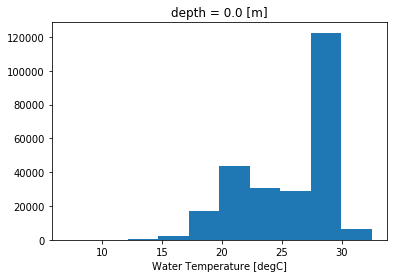

In [22]:

# Directly plot just a fre
two_day_conus.plot()
plt.show()

In [23]:
temp_0601_0701

<xarray.DataArray 'water_temp' (time: 31)>
array([23.897   , 23.674   , 23.748001, 23.625   , 24.254   , 24.101   ,
       24.226   , 25.695   , 26.449001, 26.609001, 26.616001, 27.071   ,
       27.109001, 27.061   , 26.775   , 26.284   , 26.458   , 26.689   ,
       26.134   , 26.438   , 26.524   , 26.864   , 26.801   , 26.639   ,
       26.637001, 27.037   , 26.927   , 27.156   , 27.715   , 27.696001,
       27.535   ], dtype=float32)
Coordinates:
    depth    float64 0.0
    lat      float64 28.0
    lon      float64 128.0
  * time     (time) datetime64[ns] 2012-06-01 2012-06-02 ... 2012-07-01
Attributes:
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    units:          degC
    NAVO_code:      15

# Animate

In [24]:
#Subset

nwp_surf = hycom.sel(lat=slice(10, 38), 
    lon=slice(118, 150), depth=0)

nwp_surf

<xarray.Dataset>
Dimensions:     (lat: 351, lon: 401, time: 366)
Coordinates:
    depth       float64 0.0
  * lat         (lat) float64 10.0 10.08 10.16 10.24 ... 37.76 37.84 37.92 38.0
  * lon         (lon) float64 118.0 118.1 118.2 118.2 ... 149.8 149.9 150.0
  * time        (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Data variables:
    water_u     (time, lat, lon) float32 ...
    water_v     (time, lat, lon) float32 ...
    water_temp  (time, lat, lon) float32 ...
    surf_el     (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.0 NAVO_netcdf_v1.0

In [25]:
nwp_surf['water_temp']

<xarray.DataArray 'water_temp' (time: 366, lat: 351, lon: 401)>
[51514866 values with dtype=float32]
Coordinates:
    depth    float64 0.0
  * lat      (lat) float64 10.0 10.08 10.16 10.24 ... 37.76 37.84 37.92 38.0
  * lon      (lon) float64 118.0 118.1 118.2 118.2 ... 149.8 149.8 149.9 150.0
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Attributes:
    long_name:      Water Temperature
    standard_name:  sea_water_temperature
    units:          degC
    NAVO_code:      15

In [26]:
nwp_surf['surf_el']

<xarray.DataArray 'surf_el' (time: 366, lat: 351, lon: 401)>
[51514866 values with dtype=float32]
Coordinates:
    depth    float64 0.0
  * lat      (lat) float64 10.0 10.08 10.16 10.24 ... 37.76 37.84 37.92 38.0
  * lon      (lon) float64 118.0 118.1 118.2 118.2 ... 149.8 149.8 149.9 150.0
  * time     (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Attributes:
    long_name:      Water Surface Elevation
    standard_name:  sea_surface_elevation
    units:          m
    NAVO_code:      32

## Exporting your subset HYCOM data 

In [27]:
#Save HYCOM as it was downloaded to .nc file 
#hycom.to_netcdf("HYCOM/hycom.nc")

#Save just the study region
nwp = hycom.sel(lat=slice(10, 38), 
    lon=slice(118, 150))


#Save just the surface of the study region
nwp_surf = hycom.sel(lat=slice(10, 38), 
    lon=slice(118, 150), depth=0)

In [28]:
nwp_surf

<xarray.Dataset>
Dimensions:     (lat: 351, lon: 401, time: 366)
Coordinates:
    depth       float64 0.0
  * lat         (lat) float64 10.0 10.08 10.16 10.24 ... 37.76 37.84 37.92 38.0
  * lon         (lon) float64 118.0 118.1 118.2 118.2 ... 149.8 149.9 150.0
  * time        (time) datetime64[ns] 2012-01-01 2012-01-02 ... 2012-12-31
Data variables:
    water_u     (time, lat, lon) float32 ...
    water_v     (time, lat, lon) float32 ...
    water_temp  (time, lat, lon) float32 ...
    surf_el     (time, lat, lon) float32 ...
Attributes:
    classification_level:      UNCLASSIFIED
    distribution_statement:    Approved for public release. Distribution unli...
    downgrade_date:            not applicable
    classification_authority:  not applicable
    institution:               Naval Oceanographic Office
    source:                    HYCOM archive file
    history:                   archv2ncdf3z
    field_type:                instantaneous
    Conventions:               CF-1.0 NAVO_netcdf_v1.0

# Download


In [29]:
#Subset the dataset by timestep
days, datasets = zip(*nwp_surf.groupby("time"))

#write a list of file names based on the timestep
#paths = [f"OGCM_Otis/GLBu0.08_expt_19.1nwp_surf_{y}_UV.nc" for y in days]

#Insert your name!
paths = [f"OGCM_NAME/GLBu0.08_expt_19.1nwp_surf_{y}_UV.nc" for y in days]

xr.save_mfdataset(datasets, paths)
        